### Conceitos de Logica Fuzzy para calssificação de querogênio

In [12]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
custom_style = {
    'figure.figsize': (8, 6),
    'font.family':'sans-serif',
    'axes.facecolor': 'lightgray',
    'figure.facecolor':'silver',
    'scatter.marker': 'o',
    'font.size': 9,
    'axes.grid': True
    }

#### Faixas de Valores:

* Tipo I: {IH > 600} ___ {S1/S3 > 15}
* Tipo II: {IH > 300 and IH <= 600} ___ {S1/S3 > 10 and S1/S3 <15}
* Tipo II/III: {IH > 200 and IH <=300} ___ {S1/S3 > 5 and S1/S3 < 10]
* Tipo III: {IH > 50 and IH <= 200} ___ {S1/S3 > 1 and S1/S3 < 5}
* Tipo IV: {IH <= 50} ___ {S1/S3 < 1}

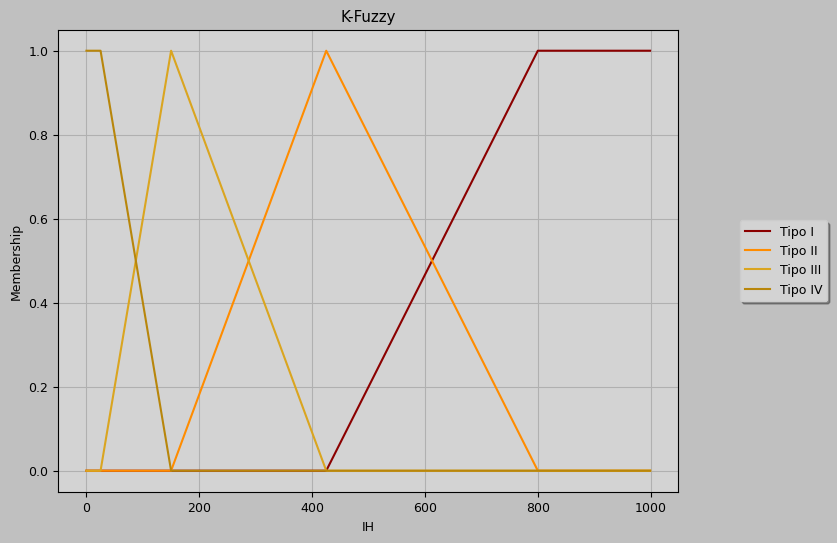

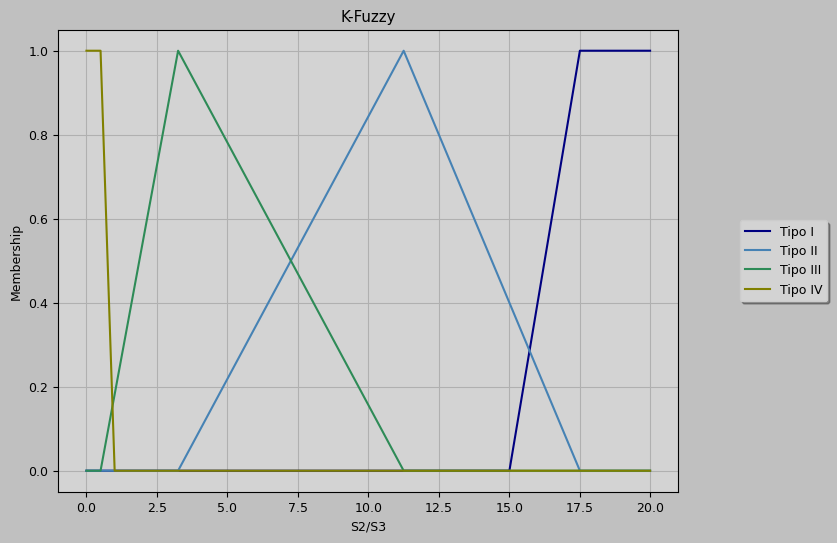

In [14]:
# Definição de funções triangulares e trapeziais 

# IH
x = np.arange(0, 1000, 1)
Tipo_I = fuzz.trapmf(x, [425, 800, 1000, 1000])
Tipo_II  = fuzz.trimf(x, [150, 425, 800])
Tipo_III = fuzz.trimf(x, [25, 150, 425])
Tipo_IV  = fuzz.trapmf(x, [0,0, 25, 150])
#Plotting 
plt.figure()
plt.plot(x, Tipo_I, linewidth=1.5, label='Tipo I', c="darkred")
plt.plot(x, Tipo_II, linewidth=1.5, label='Tipo II',c="darkorange")
plt.plot(x, Tipo_III, linewidth=1.5, label='Tipo III',c="goldenrod")
plt.plot(x, Tipo_IV, linewidth=1.5, label='Tipo IV',c="darkgoldenrod")
plt.title('K-Fuzzy')
plt.ylabel('Membership')
plt.xlabel("IH")
plt.style.use(custom_style)
plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5),
ncol=1, fancybox=True, shadow=True)

# S2/S3
y = np.arange(0, 20, 0.01)
Tipo_I = fuzz.trapmf(y, [15, 17.5, 20, 20])
Tipo_II  = fuzz.trimf(y, [3.25, 11.25, 17.5])
Tipo_III = fuzz.trimf(y, [0.5, 3.25, 11.25])
Tipo_IV  = fuzz.trapmf(y, [0,0, 0.5, 1])
#Plotting 
plt.figure()
plt.plot(y, Tipo_I, linewidth=1.5, label='Tipo I', c="navy")
plt.plot(y, Tipo_II, linewidth=1.5, label='Tipo II',c="steelblue")
plt.plot(y, Tipo_III, linewidth=1.5, label='Tipo III',c="seagreen")
plt.plot(y, Tipo_IV, linewidth=1.5, label='Tipo IV',c="olive")
plt.title('K-Fuzzy')
plt.ylabel('Membership')
plt.xlabel("S2/S3")
plt.style.use(custom_style)
plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5),
ncol=1, fancybox=True, shadow=True)
